In [5]:
# Imports
import numpy as np
rnd = np.random
np.random.seed(0)

import matplotlib.pyplot as plt




In [6]:
def calculate_transaction_sum(orders):
    """
    Calculate the sum of prices from all transactions that occurred.

    Parameters:
    orders (list): A list of orders, where each order is [type, price].
                   type = +1 for buy, -1 for sell

    Returns:
    int: Sum of prices from all transactions.
    """
    buy_orders = []  # Stores buy orders in descending order (max-heap-like behavior)
    sell_orders = []  # Stores sell orders in ascending order (min-heap-like behavior)
    transaction_sum = 0  # Sum of all transaction prices

    for order_type, price in orders:
        if order_type == +1:  # Buy order
            # Match with the lowest-priced sell order
            while sell_orders and sell_orders[0] <= price:
                transaction_sum += sell_orders.pop(0)  # Add the matched sell price to the sum
                break
            else:
                # If no match, add to buy orders
                buy_orders.append(price)
                buy_orders.sort(reverse=True)  # Keep buy orders sorted in descending order
        elif order_type == -1:  # Sell order
            # Match with the highest-priced buy order
            while buy_orders and buy_orders[0] >= price:
                transaction_sum += buy_orders.pop(0)  # Add the matched buy price to the sum
                break
            else:
                # If no match, add to sell orders
                sell_orders.append(price)
                sell_orders.sort()  # Keep sell orders sorted in ascending order

    return format(transaction_sum, '.2f')

In [7]:
# Generate 1_000 random orders, randomized type = +1 for buy, -1 for sell, randomized prices between 1 and 1_000_000
n = 1_000

orders = []
for i in range(n):
    orders += [[rnd.choice([-1, 1]), float(format(rnd.uniform(1, 1_000_000), '.2f'))]]

print("Orders:", orders)
result = calculate_transaction_sum(orders)

# Sum of transaction prices
print("Total Transaction Sum:", result)


Orders: [[np.int64(-1), 592845.03], [np.int64(-1), 602763.77], [np.int64(1), 847251.89], [np.int64(1), 645894.47], [np.int64(-1), 297535.31], [np.int64(-1), 963662.8], [np.int64(-1), 477665.64], [np.int64(1), 528895.39], [np.int64(-1), 392785.4], [np.int64(1), 71036.99], [np.int64(1), 648172.22], [np.int64(-1), 832620.01], [np.int64(-1), 140351.64], [np.int64(-1), 978618.36], [np.int64(-1), 800910.95], [np.int64(1), 780529.4], [np.int64(-1), 720632.93], [np.int64(1), 143354.14], [np.int64(1), 758615.87], [np.int64(-1), 414662.53], [np.int64(1), 186333.16], [np.int64(-1), 456150.88], [np.int64(-1), 135219.04], [np.int64(-1), 617635.88], [np.int64(-1), 222322.17], [np.int64(1), 943748.13], [np.int64(1), 449950.54], [np.int64(1), 437032.52], [np.int64(1), 99281.25], [np.int64(1), 666767.05], [np.int64(1), 170910.41], [np.int64(-1), 128927.17], [np.int64(-1), 607831.06], [np.int64(-1), 570197.2], [np.int64(-1), 634274.42], [np.int64(-1), 102045.71], [np.int64(1), 635059.24], [np.int64(-1),

ORDER DISTRIBUTION STATISTICS
Total Orders: 1000
Buy Orders (+1): 507 (50.7%)
Sell Orders (-1): 493 (49.3%)

BUY ORDER STATISTICS:
  Average Price: $505,496.57
  Median Price: $507,636.04
  Min Price: $2,065.63
  Max Price: $999,853.83

SELL ORDER STATISTICS:
  Average Price: $513,138.10
  Median Price: $517,121.86
  Min Price: $546.96
  Max Price: $998,847.01

Transaction Sum: $200635757.19


/tmp/ipykernel_8394/3956000734.py:52: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  axes[1, 0].boxplot([buy_prices, sell_prices], labels=['Buy Orders', 'Sell Orders'],


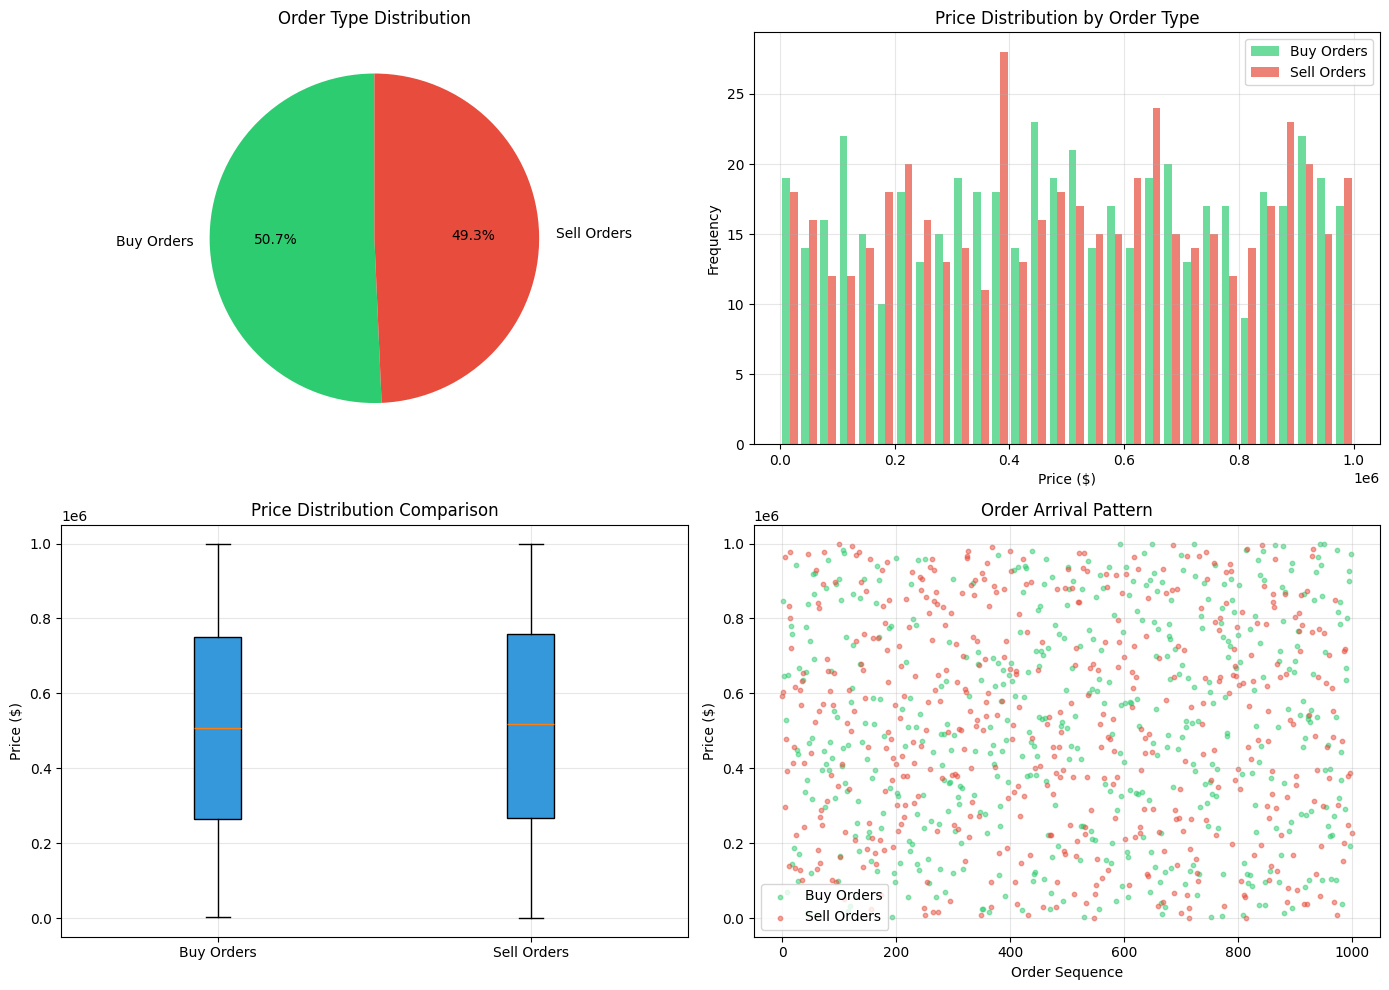

In [ ]:
# Analysis: Order Distribution and Statistics

# Count buy and sell orders
buy_count = sum(1 for order_type, _ in orders if order_type == 1)
sell_count = sum(1 for order_type, _ in orders if order_type == -1)

# Extract prices for buy and sell orders
buy_prices = [price for order_type, price in orders if order_type == 1]
sell_prices = [price for order_type, price in orders if order_type == -1]

# Calculate statistics
print("=" * 50)
print("ORDER DISTRIBUTION STATISTICS")
print("=" * 50)
print(f"Total Orders: {len(orders)}")
print(f"Buy Orders (+1): {buy_count} ({buy_count/len(orders)*100:.1f}%)")
print(f"Sell Orders (-1): {sell_count} ({sell_count/len(orders)*100:.1f}%)")
print()
print("BUY ORDER STATISTICS:")
print(f"  Average Price: ${np.mean(buy_prices):,.2f}")
print(f"  Median Price: ${np.median(buy_prices):,.2f}")
print(f"  Min Price: ${min(buy_prices):,.2f}")
print(f"  Max Price: ${max(buy_prices):,.2f}")
print()
print("SELL ORDER STATISTICS:")
print(f"  Average Price: ${np.mean(sell_prices):,.2f}")
print(f"  Median Price: ${np.median(sell_prices):,.2f}")
print(f"  Min Price: ${min(sell_prices):,.2f}")
print(f"  Max Price: ${max(sell_prices):,.2f}")
print()
print(f"Transaction Sum: ${result}")
print("=" * 50)

# Create visualizations
fig, axes = plt.subplots(2, 2, figsize=(14, 10))

# 1. Order Type Distribution (Pie Chart)
axes[0, 0].pie([buy_count, sell_count], labels=['Buy Orders', 'Sell Orders'], 
               autopct='%1.1f%%', colors=['#2ecc71', '#e74c3c'], startangle=90)
axes[0, 0].set_title('Order Type Distribution')

# 2. Price Distribution (Histogram)
axes[0, 1].hist([buy_prices, sell_prices], bins=30, label=['Buy Orders', 'Sell Orders'], 
                color=['#2ecc71', '#e74c3c'], alpha=0.7)
axes[0, 1].set_xlabel('Price ($)')
axes[0, 1].set_ylabel('Frequency')
axes[0, 1].set_title('Price Distribution by Order Type')
axes[0, 1].legend()
axes[0, 1].grid(alpha=0.3)

# 3. Buy vs Sell Price Comparison (Box Plot)
axes[1, 0].boxplot([buy_prices, sell_prices], tick_labels=['Buy Orders', 'Sell Orders'],
                    patch_artist=True, boxprops=dict(facecolor='#3498db'))
axes[1, 0].set_ylabel('Price ($)')
axes[1, 0].set_title('Price Distribution Comparison')
axes[1, 0].grid(alpha=0.3)

# 4. Order Arrival Sequence
order_sequence_buy = [i for i, (order_type, _) in enumerate(orders) if order_type == 1]
order_sequence_sell = [i for i, (order_type, _) in enumerate(orders) if order_type == -1]
axes[1, 1].scatter(order_sequence_buy, [buy_prices[i] for i in range(len(buy_prices))], 
                   alpha=0.5, s=10, c='#2ecc71', label='Buy Orders')
axes[1, 1].scatter(order_sequence_sell, [sell_prices[i] for i in range(len(sell_prices))], 
                   alpha=0.5, s=10, c='#e74c3c', label='Sell Orders')
axes[1, 1].set_xlabel('Order Sequence')
axes[1, 1].set_ylabel('Price ($)')
axes[1, 1].set_title('Order Arrival Pattern')
axes[1, 1].legend()
axes[1, 1].grid(alpha=0.3)

plt.tight_layout()
plt.show()
